# Communicate-Data-Finding-Exploratory-with-Ford-GoBike-System-Data

# Table of Contents

1) Introduction of the topic and dataset
    
2) Dataset Investigation and preliminary wrangling
    
3) Further Data Wrangling
    
4) Univariate Exploration and Analysis
    
5) Bivariate Exploration and Analysis
    
6) Multivariate Exploration and Analysis
    
7) Conclusions and answers


# Preliminary Wrangling

I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data
    
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Multiple data files will need to be joined together if a full year’s coverage is desired.

The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import zipfile as zf

In [3]:
# create the path and get the name list under the path 
curDir = os.getcwd()
path = curDir+'\\Ford_Go_Bike_Dataset\\'
input_files = os.listdir(path)


# build the frame df by appending each file
file_list = []

for input_file in input_files:
    #print(text_file)
    filename = path+input_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df1 = pd.concat(file_list) 
df2 =  df1.copy()   
df2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


# DATA ANALYSIS AND CLEANING PROCESS

In [4]:
# to know the structure of the data
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# to know the shape of data
df2.shape

(1863721, 16)

In [6]:
# for analysis of each coloumn
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [7]:
# to get the information about data type
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [8]:
df2.nunique()

duration_sec                 16709
start_time                 1863584
end_time                   1863610
start_station_id               331
start_station_name             348
start_station_latitude         369
start_station_longitude        370
end_station_id                 331
end_station_name               348
end_station_latitude           370
end_station_longitude          371
bike_id                       5054
user_type                        2
member_birth_year               86
member_gender                    3
bike_share_for_all_trip          2
dtype: int64

In [9]:
# to check the null value in the data type
df2.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [10]:
# to drop the unwanted coloumn
df2.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,47.0,4th St at Harrison St,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,1991.0,Male,No


In [11]:
# to check wether null value exist or not
df2.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
end_station_id              11771
end_station_name            11771
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [12]:
# to check the shape of new data shape
df2.shape

(1863721, 12)

In [13]:
# to replace the NaN with the mean of member_birth_year coloumn
df2['member_birth_year'] = df2['member_birth_year'].fillna((df2['member_birth_year'].mean()))

In [14]:
# to replace the NaN with the 0 of gender coloumn
df2['member_gender'] = df2['member_gender'].fillna(0)

In [15]:
# to check the the updated coloumn value
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,1986.000000,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,1983.087962,0,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,1996.000000,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,47.0,4th St at Harrison St,321,Customer,1983.087962,0,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,1991.000000,Male,No


In [16]:
# to describe the modify data set
df2.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.851950e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,1.181730e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.004403e+02,1.287733e+03,1.012795e+01
min,6.100000e+01,3.000000e+00,3.000000e+00,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.000000e+01,1.225000e+03,1.979000e+03
50%,5.560000e+02,8.900000e+01,8.800000e+01,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,1.830000e+02,3.333000e+03,1.990000e+03
max,8.636600e+04,3.810000e+02,3.810000e+02,6.234000e+03,2.000000e+03


In [17]:
# to check wether duplicate exist or not in the data set
df2.duplicated().sum()

0

Data visualization is an important skill that is used in many parts of the data analysis process. 
Exploratory data visualization generally occurs during and after the data wrangling process, 
and is the main method that you will use to understand the patterns and relationships present 
in your data. This understanding will help you approach any statistical analyses and will help 
you build conclusions and findings. This process might also illuminate additional data cleaning
tasks to be performed. Explanatory data visualization techniques are used after generating your 
findings, and are used to help communicate your results to others. Understanding design 
considerations will make sure that your message is clear and effective. In addition to being a 
good producer of visualizations, going through this project will also help you be a good consumer 
of visualizations that are presented to you by others.

# DATA STRUCTURE 
This csv file include 1863721 rows and 12 coloumn

In [18]:
# to check the result of data cleaning.
df2.shape

(1863721, 12)

# The features I think will help support my investigation into feature(s) of interest

Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender


In my opinion the following questions are the most important question in the data set.

1) How long does the average trip take.

2) In which decade most ford bike used.

3) Is the trip duration affected by weather( months/seasons).

4) Does the trip duration depend upon if a user is a subscriber or customer.

5) Which gender used most ford bike.

# PART 1

# UNIVARIATE    EXPLORATION

Evaluating Question 1) How long does the average trip take.

Text(0.5,0,'duration_sec')

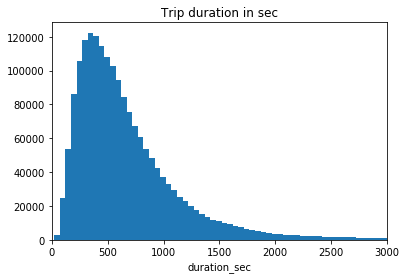

In [19]:
# Let's plot the distribution of trip duration.  
# the trip duration unit in second. 
bins = np.arange(20, df2['duration_sec'].max() + 50 , 50)
plt.hist(data = df2, x = 'duration_sec' , bins = bins)
plt.xlim(0,3000)
plt.title('Trip duration in sec')
plt.xlabel('duration_sec')

Its really very difficult to vizualize the graph because its right skewed and edges are not easy to observe. In order to

proper vizualizatin I convert time duration in second to minute by dividing with 60. In addition to that i also add logarithm 

transformatio which was explain by the instructor during video lecture. 

** I refer the code below from instructor video lecture **

Text(0.5,0,'Duration_minute')

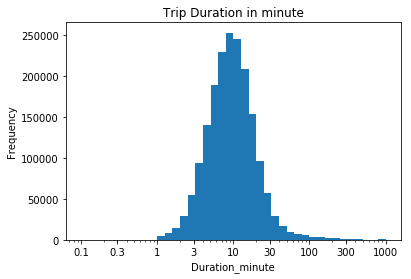

In [20]:
# # Let's plot the distribution of trip duration.  
# change the trip duration unit from second to min 
df2['duration_min'] = df2['duration_sec'] / 60
df2.drop('duration_sec' , axis = 1 , inplace = True)

bins = 10**np.arange(-1 , 3.0+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df2 , x = 'duration_min' , bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title('Trip Duration in minute')
plt.ylabel('Frequency')
plt.xlabel('Duration_minute')

#  CONCLUSION 1

** Majority of population uses the bikes for small time duration which is 10 minute.

Evaluating Question 2) In which decade most ford bike used.

Text(0,0.5,'No of Bike Users')

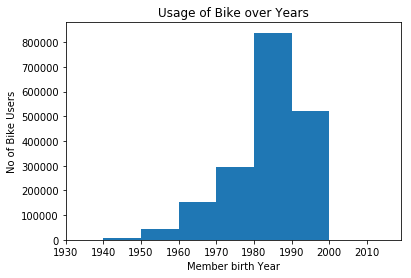

In [21]:
# I choose to plot the histogram to show the relationship between memeber_birth_year and No of Users.
bins = np.arange(10, df2['member_birth_year'].max() + 10 , 10)
plt.hist(data = df2, x = 'member_birth_year' , bins = bins)
plt.xlim(1930,2019)
plt.title('Usage of Bike over Years')
plt.xlabel('Member birth Year')
plt.ylabel('No of Bike Users')

# CONCLUSION 2

**The population who have birth year between 1980 and 1990 uses the ford bike most

# PART 2

# BIVARIENT EXPLORATION

Evaluating Question 3) Is the trip duration affected by weather( months/seasons).

In [22]:
# create month column by extracting months of start_time 

df2['month'] = pd.DatetimeIndex(df2['start_time']).month
df2['month'].value_counts()

10    201458
7     199222
6     195968
8     192162
9     186217
5     179125
11    134135
12    131363
4     131169
3     111382
2     106718
1      94802
Name: month, dtype: int64

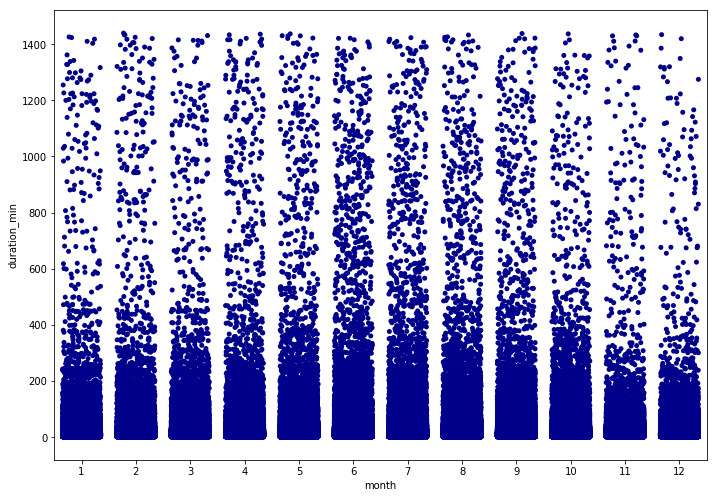

In [24]:
#If you do decide to use scatterplot, you should use a plot type that allows you to jitter the data (that is, move it randomly, 
#from side to side, on the axis that is discrete).
#scatterplot (jittered) - month and duration
plt.figure(figsize= [11.69, 8.27])
ax = sb.stripplot(x ="month", y = "duration_min", data = df2, jitter = 0.35, dodge = True, color = "darkblue")

** From the above graph we conclude that June, July and August are mostly effected by the weather.

In [25]:
# Create 4 season spring, summer, fall and winter.
winter = df2.query('month in ["12" , "1" , "2"]' ).duration_min.mean()
spring = df2.query('month in ["3" , "4" , "5"]' ).duration_min.mean ()
summer = df2.query('month in ["6" , "7" , "8"] ').duration_min.mean()
fall = df2.query('month in ["9" , "10" , "11"] ').duration_min.mean()



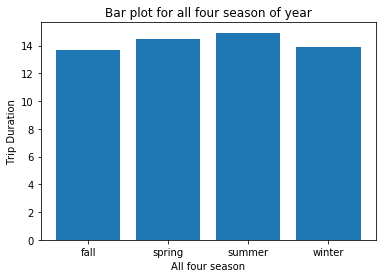

In [26]:
# Create 4 season categories using bar chart for detail analysis.
# Plooting
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter] )
plt.title('Bar plot for all four season of year')
plt.xlabel('All four season')
plt.ylabel('Trip Duration');

**The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, 
  New York, which have very different four seasons, the weather in SF does not change that much.


1) There is no significant difference of trip duration in terms of four seasons. 

   It is probably because the weather in San Francisco bay area does not change that much.

2) The most unexpected result is for fall. fall has the lowest trip duration in 2018. 

   Fall is most likely to experience good weather with pleasant average temperatures in San Francisco. 
    
   People are more likely to go out and play outdoor games or do outdoor activities like yoga and exercises.

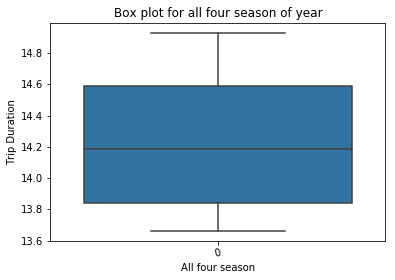

In [27]:
# for the same data i use box plot to better understand the relationship between them.
sb.boxplot(data = [spring , summer , fall , winter]);
plt.title('Box plot for all four season of year')
plt.xlabel('All four season')
plt.ylabel('Trip Duration');
plt.xticks(rotation = 15);

In [28]:
# Trip duration of spring season.
spring

14.478559960728035

In [29]:
# Trip duration of Fall season.
summer

14.928832965580831

In [30]:
# Trip duration of winter season.
winter

13.897462371664213

In [31]:
# Trip duration of fall season.
fall

13.66316596717842

** Summer have the highest trip duration with 14.92. However fall have the lowest trip duration of 13.66

# CONCLUSION 3

** The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, 

which have very different four seasons, the weather in SF does not change that much.


Evaluating Question 4) Does the trip duration depend upon if a user is a subscriber or customer.

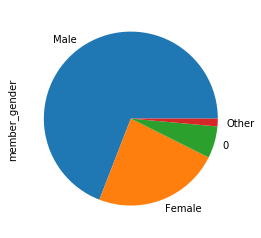

In [32]:
# Plotting pie chart to show the relationship between gender and number of uses of ford bike.
df2["member_gender"].value_counts().plot.pie()
plt.gca().set_aspect("equal")

# CONCLUSION 4

** Male uses more than twice ford bike as compared to the female While other uses less number of ford bike as compared to male and female.

# PART 3

# MULTIVARIENT EXPLORATION

Evaluating Question 3) Does the trip duration depend upon if a user is a subscriber or customer. 

Text(0.5,1,'Trip Duration in minute verses Month and User Type')

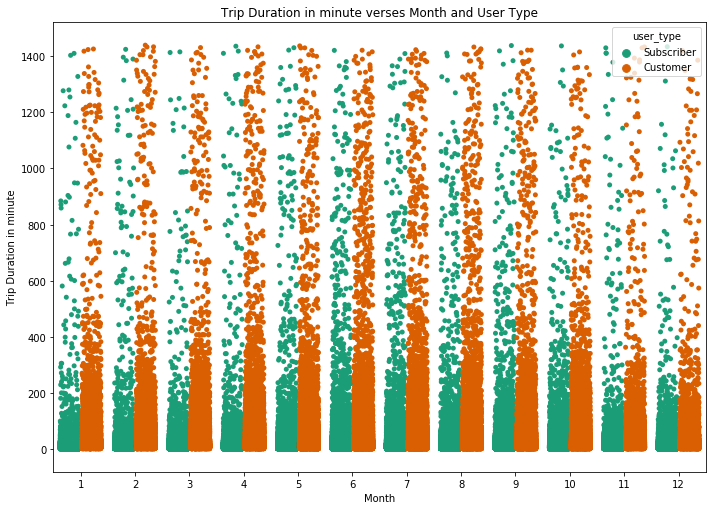

In [33]:
#In this case, you can add the option hue = 'user_type', will will reproduce the plot above. 
#In this case, you have the option whether or not to dodge the user type data 
#(i.e. separate them to show the distribution more clearly). Here are those two options:
plt.figure(figsize=[11.69, 8.27])
ax = sb.stripplot(x = "month", y="duration_min", hue = 'user_type', data = df2, jitter = 0.35, dodge = True, palette = "Dark2")
plt.xlabel('Month')
plt.ylabel('Trip Duration in minute')
plt.title('Trip Duration in minute verses Month and User Type')

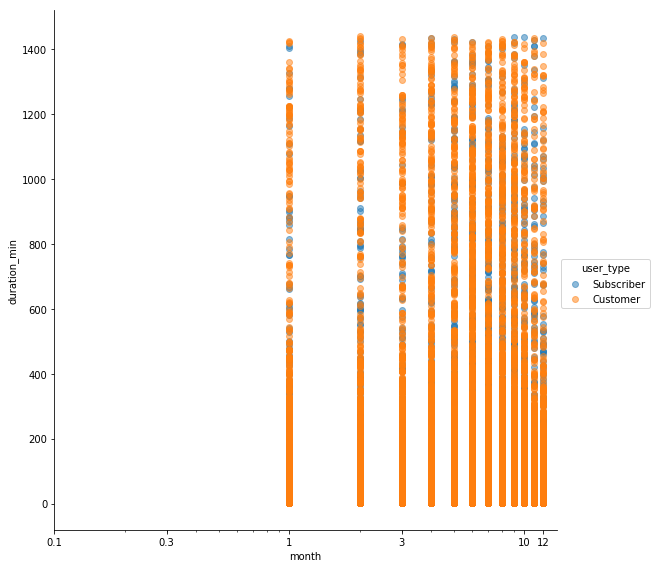

In [34]:
# I saw the below code snippet in instructor lesson and it was also use in practice problem. 
#So I want to use this code in this multivarient section and want to observe the effect which is producing by scaling.
# plotting
g = sb.FacetGrid(data = df2, hue = 'user_type', size = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 0.5)
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 12]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

# CONCLUSION 5

1) From the above two plot we conclude that there are far more customers than subscribers. The user type does make an impact on trip duration.

2) The most important point about the subscribers is that they rent the bikes for long trips, above 300 minutes.

# Summary of findings :

Since the trip duration has a close relationship with bike share company's revenue, I tried to find out what are 
the key factors affect trip duration. It turns out that Weather does not have a big effect on the trip duration 
but user type does have an impact on trip duration. According the analysis, I found subscribers tend to rend the
bikes for longer trips ( generally above 300 minutes ). One possible way to increase revenue is to attract more
potential customers and convert more exiting customers to subscribers.
